# Emoji Sentiment Analysis with Tweets_zh
        
## step1-Data collection
1. querry for data from twitter api
    - period: 2022-0415-2022-0528
    - filter: retweet or media
    - querry:tweeets that contain at least one concerned emoji

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTigQWzoYCNiDyrz1BN4WTf2X2k9OZ_yvW-FsmcIMsdS9fppNmh)

In this section, we refer to [Ian D. Wood, Sebastian Ruder, 2016](https://www.researchgate.net/publication/321057905_Emoji_as_Emotion_Tags_for_Tweets) to choose commonly used emojis.

In [1]:
# ! pip install Tweepy
import os
os.getcwd()

'/Users/leahtan/Documents/3_study/self_study/Python/2022_spring_CTA/project/code'

In [2]:
# ! cd /Users/leahtan/Documents/3_study/self_study/Python/2022_spring_CTA/project/code

## Scraping Chinese Tweets with emojis

### step 1.1: construct a list of common emojis
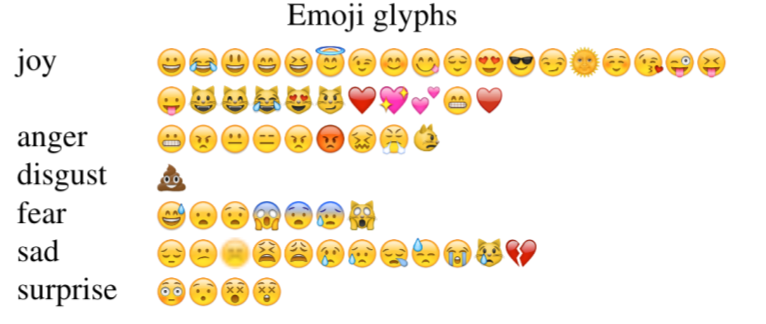
 
### step 1.2: def querry

### step 1.3: scraping and save to csv

-------
## 1.1, list of common emojis
In this section, we refer to [Ian D. Wood, Sebastian Ruder, 2016](https://www.researchgate.net/publication/321057905_Emoji_as_Emotion_Tags_for_Tweets) to choose commonly used emojis.

In [3]:

joy = ['\U0001F600', '\U0001F602', '\U0001F603', '\U0001F604',
          '\U0001F606', '\U0001F607', '\U0001F609', '\U0001F60A',
          '\U0001F60B', '\U0001F60C', '\U0001F60D', '\U0001F60E',
          '\U0001F60F', '\U0001F31E', '\U0000263A', '\U0001F618',
          '\U0001F61C', '\U0001F61D', '\U0001F61B', '\U0001F63A',
          '\U0001F638', '\U0001F639', '\U0001F63B', '\U0001F63C',
          '\U00002764', '\U0001F496', '\U0001F495', '\U0001F601',
          '\U00002665']#joy

anger = ['\U0001F62C', '\U0001F620', '\U0001F610',
          '\U0001F611', '\U0001F620', '\U0001F621', '\U0001F616',
          '\U0001F624', '\U0001F63E']#anger
disgust= ['\U0001F4A9']#disgust
fear = ['\U0001F605', '\U0001F626', '\U0001F627', '\U0001F631',
          '\U0001F628', '\U0001F630', '\U0001F640']#fear
sad = ['\U0001F614', '\U0001F615', '\U00002639', '\U0001F62B',
          '\U0001F629', '\U0001F622', '\U0001F625', '\U0001F62A',
          '\U0001F613', '\U0001F62D', '\U0001F63F', '\U0001F494']#sad
surp = ['\U0001F633', '\U0001F62F', '\U0001F635', '\U0001F632']#surprise

emojis = joy + anger + disgust + fear + sad + surp
print(emojis)
print(len(emojis))

['😀', '😂', '😃', '😄', '😆', '😇', '😉', '😊', '😋', '😌', '😍', '😎', '😏', '🌞', '☺', '😘', '😜', '😝', '😛', '😺', '😸', '😹', '😻', '😼', '❤', '💖', '💕', '😁', '♥', '😬', '😠', '😐', '😑', '😠', '😡', '😖', '😤', '😾', '💩', '😅', '😦', '😧', '😱', '😨', '😰', '🙀', '😔', '😕', '☹', '😫', '😩', '😢', '😥', '😪', '😓', '😭', '😿', '💔', '😳', '😯', '😵', '😲']
62


## 1.2. define querry

In [4]:
# decide the scrabing 
# there is a limitation in twitter api per month
# we are about to firstly craw approximately 100,000 Tweets. 
# To balance the sample, we calculate the required scale of each group separately
# The weight is the number of emojis containted in each group
sum = 1000000
list = [joy, anger, disgust, fear, sad, surp]
maxquerry = []
for group in list:
    sample = int((sum/62)*len(group))
    maxquerry.append(sample)
print(maxquerry)

[467741, 145161, 16129, 112903, 193548, 64516]


In [5]:
date = '2022-05-26'

In [6]:
# Twitter API Authentication
import tweepy
consumer_key = 'B1HITEZpHcS4isYU492RaBKcu'
consumer_secret = 'qiO3lHo2VECACt50My2Y6eozkliAiEMkbD967MA9BFmDhD3Z4l'
access_token = '1355036933823541248-PAxS6qX9CqpmB2wVHDcmIcmmM9fnZa'
access_token_secret = 'vcH5ikw31xpyaqPzCCBy5Rf0y2Et6gdZsLFhM5SVUUbe4'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

# api = tweepy.API(auth, proxy='http://127.0.0.1:7890',wait_on_rate_limit=True)#proxy and automatically set timeout


## 1.3. crawing

In [27]:
import pandas as pd
df = pd.read_csv('tweets_zh.csv',converters={'id':str})
df = df[df['id'] != 'id']
df = df.drop_duplicates()
# lastid = df['id'].max()

<ipython-input-27-026230b2e863>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tweets_zh.csv',converters={'id':str})


In [28]:
# define the search request keywords
# since the URL-encoded search query of 500 characters maximum, we seperately send the requests

# 1-joy related emojis:
keywords = ' OR '.join(joy)
keywords

'😀 OR 😂 OR 😃 OR 😄 OR 😆 OR 😇 OR 😉 OR 😊 OR 😋 OR 😌 OR 😍 OR 😎 OR 😏 OR 🌞 OR ☺ OR 😘 OR 😜 OR 😝 OR 😛 OR 😺 OR 😸 OR 😹 OR 😻 OR 😼 OR ❤ OR 💖 OR 💕 OR 😁 OR ♥'

In [29]:
max_tweets = maxquerry[0]
count = int(max_tweets/7)
print('For this stream of emoji, we collect {} Tweets'.format(max_tweets))
print('For each day in the past week, we collect {} Tweets'.format(count))
lastid = ''

For this stream of emoji, we collect 467741 Tweets
For each day in the past week, we collect 66820 Tweets


In [30]:
import tweepy
import csv
t = 'joy'

print ('Twritter api:', api)
# at least contains one relevant emoji 
#filting retweets and tweets with media
query = keywords +'-filter:retweets'+'-filter:media' 
print ('Search for Tweets containing at least one of the following emoji', query)

csvFile = open('tweets_zh.csv', 'a')
csvWriter = csv.writer(csvFile)
header = ['id','time', 'tweets','source','entities','retweet','favorite','type']

if lastid == '':
    csvWriter.writerow(header) #write header to csv
    try: 
        search = tweepy.Cursor(api.search_tweets, 
                          q=query,
                          count=count,
                          result_type='recent',#Include both popular and real time results in the response.
                          lang='zh',                               
                          until=date).items()
        for status in search:
            lastid = status.id
            if len(status.text)>1:
                csvWriter.writerow([status.id, status.created_at, status.text, 
                                    status.source, status.entities, status.retweet_count, 
                                    status.favorite_count, t])#save tweets to csv
    except:
        print('Something wrong!')
        print('The last Tweet:', status.created_at, status.text)
    print('The last id:', lastid)

else:
    try: 
        search = tweepy.Cursor(api.search_tweets, 
                               q=query,
                              count=count,
                              result_type='recent',
                              lang='zh',
                               until=date,
                              max_id=lastid).items()
        # the bigger the id is, the older the Tweet is. 
        # max_id setting means the scraped Tweets is older than the the oldest one we have so far
        for status in search:
            lastid = status.id
            if len(status.text)>1:
                csvWriter.writerow([status.id, status.created_at, status.text, 
                                    status.source, status.entities, status.retweet_count, 
                                    status.favorite_count, t])#save tweets to csv
    except:
        print('Something wrong!')
        print('The last Tweet:', status.created_at, status.text)
    print('The last id:', lastid)

csvFile.close()

Twritter api: <tweepy.api.API object at 0x7fa644d72dc0>
Search for Tweets containing at least one of the following emoji 😀 OR 😂 OR 😃 OR 😄 OR 😆 OR 😇 OR 😉 OR 😊 OR 😋 OR 😌 OR 😍 OR 😎 OR 😏 OR 🌞 OR ☺ OR 😘 OR 😜 OR 😝 OR 😛 OR 😺 OR 😸 OR 😹 OR 😻 OR 😼 OR ❤ OR 💖 OR 💕 OR 😁 OR ♥-filter:retweets-filter:media
Something wrong!
The last Tweet: 2022-05-23 23:54:48+00:00 @andy37732083 @lovewing0710 人家就沒有在新竹啊😂
The last id: 


In [31]:
df = pd.read_csv('tweets_zh.csv',converters={'id':str})
df = df.drop_duplicates()
# df = df[df['id'] != 'id']
lastid = ''
df.query('type == "joy"')

<ipython-input-31-f04b5c11189e>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tweets_zh.csv',converters={'id':str},index_col=0)


,id,time,tweets,source,entities,retweet,favorite,type
0,1515279424953876481,2022-04-16 10:42:22+00:00,BOY STORY 默契大挑战 EP.02\n\n▶️https://t.co/G5T5Mc...,Twitter for iPhone,"{'hashtags': [], 'symbols': [], 'user_mentions...",131,712,joy
1,1516204930461159425,2022-04-18 23:59:59+00:00,@QFsFP3yAZKKFBwK 节省网络存储空间？😂,Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,0,joy
2,1516204918977470467,2022-04-18 23:59:57+00:00,"RT @Baoliaogeming64: 一部手机拯救了乌克兰战士的生命——一颗 7,62 ...",Twitter Web App,"{'hashtags': [], 'symbols': [], 'user_mentions...",123,0,joy
3,1516204916217311232,2022-04-18 23:59:56+00:00,RT @S7i5FV0JOz6sV3A: 去tmd病毒！泰国泼水节好开心😃 https://...,Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",106,0,joy
4,1516204913818501120,2022-04-18 23:59:55+00:00,RT @Fang961103: 沒人就脫一下\n影片有人想看嗎😊 https://t.co/...,Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",78,0,joy
...,...,...,...,...,...,...,...,...
1528887200066129920,2022-05-23 23:54:48+00:00,@andy37732083 @lovewing0710 人家就沒有在新竹啊😂,Twitter for iPhone,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,1,joy,NaN
1528888184850878464,2022-05-23 23:58:43+00:00,RT @sk55688: 💛💜ABO趴囉，畫個Alpha易感期塗鴉，喜歡AxB，A易感期到了...,Twitter for Android,"{'hashtags': [{'text': 'lucashu', 'indices': [...",594,0,joy,NaN
1528888106589765633,2022-05-23 23:58:24+00:00,@Kevin52uk @Haruo_middle @MatchaDark 哇～～～15歲！現...,Twitter for iPhone,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,3,joy,NaN
1528888020786479104,2022-05-23 23:58:04+00:00,RT @wintergreen_tsc: 争取与期待已久的功能终于上线了💪🏻 简体中文和繁体...,Twitter Web App,"{'hashtags': [{'text': 'ApeSwap', 'indices': [...",2,0,joy,NaN


In [ ]:
###
# 2-fear
keywords = ' OR '.join(fear)
keywords

In [ ]:
max_tweets = maxquerry[3]
count = int(max_tweets/7)
print('For this stream of emoji, we collect {} Tweets'.format(max_tweets))
print('For each day in the past week, we collect {} Tweets'.format(count))
lastid

In [ ]:
import tweepy
import csv
t = 'fear'

print ('Twritter api:', api)
# at least contains one relevant emoji 
#filting retweets and tweets with media
query = keywords +'-filter:retweets'+'-filter:media' 
print ('Search for Tweets containing at least one of the following emoji', query)

csvFile = open('tweets_zh.csv', 'a')
csvWriter = csv.writer(csvFile)
header = ['id','time', 'tweets','source','entities','retweet','favorite','type']

if lastid == '':
#     csvWriter.writerow(header) #write header to csv
    try: 
        search = tweepy.Cursor(api.search_tweets, 
                          q=query,
                          count=count,
                          result_type='recent',#Include both popular and real time results in the response.
                          lang='zh',                               
                          until=date).items()
        for status in search:
            lastid = status.id
            if len(status.text)>1:
                csvWriter.writerow([status.id, status.created_at, status.text, 
                                    status.source, status.entities, status.retweet_count, 
                                    status.favorite_count, t])#save tweets to csv
    except:
        print('Something wrong!')
        print('The last Tweet:', status.created_at, status.text)
    print('The last id:', lastid)

else:
    try: 
        search = tweepy.Cursor(api.search_tweets, 
                               q=query,
                              count=count,
                              result_type='recent',
                              lang='zh',
                               until=date,
                              max_id=lastid).items()
        # the bigger the id is, the older the Tweet is. 
        # max_id setting means the scraped Tweets is older than the the oldest one we have so far
        for status in search:
            lastid = status.id
            if len(status.text)>1:
                csvWriter.writerow([status.id, status.created_at, status.text, 
                                    status.source, status.entities, status.retweet_count, 
                                    status.favorite_count, t])#save tweets to csv
    except:
        print('Something wrong!')
        print('The last Tweet:', status.created_at, status.text)
    print('The last id:', lastid)

csvFile.close()

In [ ]:

df = pd.read_csv('tweets_zh.csv',converters={'id':str})
df = df[df['id'] != 'id']
df = df.drop_duplicates()
lastid = ''

df.query('type == "fear"')

In [ ]:
###
# 3-sad
keywords = ' OR '.join(sad)
keywords

In [ ]:
max_tweets = maxquerry[4]
count = int(max_tweets/7)*10
print('For this stream of emoji, we collect {} Tweets'.format(max_tweets))
print('For each day in the past week, we collect {} Tweets'.format(count))
lastid

In [ ]:
import tweepy
import csv
t = 'sad'

print ('Twritter api:', api)
# at least contains one relevant emoji 
#filting retweets and tweets with media
query = keywords +'-filter:retweets'+'-filter:media' 
print ('Search for Tweets containing at least one of the following emoji', query)

csvFile = open('tweets_zh.csv', 'a')
csvWriter = csv.writer(csvFile)
header = ['id','time', 'tweets','source','entities','retweet','favorite','type']

if lastid == '':
#     csvWriter.writerow(header) #write header to csv
    try: 
        search = tweepy.Cursor(api.search_tweets, 
                          q=query,
                          count=count,
                          result_type='recent',#Include both popular and real time results in the response.
                          lang='zh',                               
                          until=date).items()
        for status in search:
            lastid = status.id
            if len(status.text)>1:
                csvWriter.writerow([status.id, status.created_at, status.text, 
                                    status.source, status.entities, status.retweet_count, 
                                    status.favorite_count, t])#save tweets to csv
    except:
        print('Something wrong!')
        print('The last Tweet:', status.created_at, status.text)
    print('The last id:', lastid)

else:
    try: 
        search = tweepy.Cursor(api.search_tweets, 
                               q=query,
                              count=count,
                              result_type='recent',
                              lang='zh',
                               until=date,
                              max_id=lastid).items()
        # the bigger the id is, the older the Tweet is. 
        # max_id setting means the scraped Tweets is older than the the oldest one we have so far
        for status in search:
            lastid = status.id
            if len(status.text)>1:
                csvWriter.writerow([status.id, status.created_at, status.text, 
                                    status.source, status.entities, status.retweet_count, 
                                    status.favorite_count, t])#save tweets to csv
    except:
        print('Something wrong!')
        print('The last Tweet:', status.created_at, status.text)
    print('The last id:', lastid)

csvFile.close()

In [ ]:

df = pd.read_csv('tweets_zh.csv',converters={'id':str})
df = df[df['id'] != 'id']
df = df.drop_duplicates()
lastid = ''

df.query('type == "sad"')

In [ ]:
#############

In [ ]:
###
# 4-anger
keywords = ' OR '.join(anger)
keywords

In [ ]:
max_tweets = maxquerry[1]
count = int(max_tweets/7)
print('For this stream of emoji, we collect {} Tweets'.format(max_tweets))
print('For each day in the past week, we collect {} Tweets'.format(count))
lastid

In [ ]:
import tweepy
import csv
t = 'anger'

print ('Twritter api:', api)
# at least contains one relevant emoji 
#filting retweets and tweets with media
query = keywords +'-filter:retweets'+'-filter:media' 
print ('Search for Tweets containing at least one of the following emoji', query)

csvFile = open('tweets_zh.csv', 'a')
csvWriter = csv.writer(csvFile)
header = ['id','time', 'tweets','source','entities','retweet','favorite','type']

if lastid == '':
#     csvWriter.writerow(header) #write header to csv
    try: 
        search = tweepy.Cursor(api.search_tweets, 
                          q=query,
                          count=count,
                          result_type='recent',#Include both popular and real time results in the response.
                          lang='zh',                               
                          until=date).items()
        for status in search:
            lastid = status.id
            if len(status.text)>1:
                csvWriter.writerow([status.id, status.created_at, status.text, 
                                    status.source, status.entities, status.retweet_count, 
                                    status.favorite_count, t])#save tweets to csv
    except:
        print('Something wrong!')
        print('The last Tweet:', status.created_at, status.text)
    print('The last id:', lastid)

else:
    try: 
        search = tweepy.Cursor(api.search_tweets, 
                               q=query,
                              count=count,
                              result_type='recent',
                              lang='zh',
                               until=date,
                              max_id=lastid).items()
        # the bigger the id is, the older the Tweet is. 
        # max_id setting means the scraped Tweets is older than the the oldest one we have so far
        for status in search:
            lastid = status.id
            if len(status.text)>1:
                csvWriter.writerow([status.id, status.created_at, status.text, 
                                    status.source, status.entities, status.retweet_count, 
                                    status.favorite_count, t])#save tweets to csv
    except:
        print('Something wrong!')
        print('The last Tweet:', status.created_at, status.text)
    print('The last id:', lastid)

csvFile.close()

In [ ]:

df = pd.read_csv('tweets_zh.csv',converters={'id':str})
df = df[df['id'] != 'id']
df = df.drop_duplicates()
lastid = ''

df.query('type == "anger"')

In [ ]:
#############

In [ ]:
###
# 5-surprise
keywords = ' OR '.join(surp)
keywords

In [ ]:
max_tweets = maxquerry[5]
count = int(max_tweets/7)*100
print('For this stream of emoji, we collect {} Tweets'.format(max_tweets))
print('For each day in the past week, we collect {} Tweets'.format(count))
lastid

In [ ]:
import tweepy
import csv
t = 'surprise'

print ('Twritter api:', api)
# at least contains one relevant emoji 
#filting retweets and tweets with media
query = keywords +'-filter:retweets'+'-filter:media' 
print ('Search for Tweets containing at least one of the following emoji', query)

csvFile = open('tweets_zh.csv', 'a')
csvWriter = csv.writer(csvFile)
header = ['id','time', 'tweets','source','entities','retweet','favorite','type']

if lastid == '':
#     csvWriter.writerow(header) #write header to csv
    try: 
        search = tweepy.Cursor(api.search_tweets, 
                          q=query,
                          count=count,
                          result_type='recent',#Include both popular and real time results in the response.
                          lang='zh',                               
                          until=date).items()
        for status in search:
            lastid = status.id
            if len(status.text)>1:
                csvWriter.writerow([status.id, status.created_at, status.text, 
                                    status.source, status.entities, status.retweet_count, 
                                    status.favorite_count, t])#save tweets to csv
    except:
        print('Something wrong!')
        print('The last Tweet:', status.created_at, status.text)
    print('The last id:', lastid)

else:
    try: 
        search = tweepy.Cursor(api.search_tweets, 
                               q=query,
                              count=count,
                              result_type='recent',
                              lang='zh',
                               until=date,
                              max_id=lastid).items()
        # the bigger the id is, the older the Tweet is. 
        # max_id setting means the scraped Tweets is older than the the oldest one we have so far
        for status in search:
            lastid = status.id
            if len(status.text)>1:
                csvWriter.writerow([status.id, status.created_at, status.text, 
                                    status.source, status.entities, status.retweet_count, 
                                    status.favorite_count, t])#save tweets to csv
    except:
        print('Something wrong!')
        print('The last Tweet:', status.created_at, status.text)
    print('The last id:', lastid)

csvFile.close()

In [ ]:

df = pd.read_csv('tweets_zh.csv',converters={'id':str})
df = df[df['id'] != 'id']
df = df.drop_duplicates()
lastid = ''

df.query('type == "surprise"')

In [ ]:
#############

In [ ]:
###
# 5-disgust
keywords = ' OR '.join(disgust)
keywords

In [ ]:
max_tweets = maxquerry[2]
count = int(max_tweets/7)
print('For this stream of emoji, we collect {} Tweets'.format(max_tweets))
print('For each day in the past week, we collect {} Tweets'.format(count))
lastid

In [ ]:
import tweepy
import csv
t = 'disgust'

print ('Twritter api:', api)
# at least contains one relevant emoji 
#filting retweets and tweets with media
query = keywords +'-filter:retweets'+'-filter:media' 
print ('Search for Tweets containing at least one of the following emoji', query)

csvFile = open('tweets_zh.csv', 'a')
csvWriter = csv.writer(csvFile)
header = ['Unnamed: 0	','id','time', 'tweets','source','entities','retweet','favorite','type']

if lastid == '':
    csvWriter.writerow(header) #write header to csv
    try: 
        search = tweepy.Cursor(api.search_tweets, 
                          q=query,
                          count=count,
                          result_type='recent',#Include both popular and real time results in the response.
                          lang='zh',                               
                          until=date).items()
        for status in search:
            lastid = status.id
            if len(status.text)>1:
                csvWriter.writerow(['',status.id, status.created_at, status.text, 
                                    status.source, status.entities, status.retweet_count, 
                                    status.favorite_count, t])#save tweets to csv
    except:
        print('Something wrong!')
        print('The last Tweet:', status.created_at, status.text)
    print('The last id:', lastid)

else:
    try: 
        search = tweepy.Cursor(api.search_tweets, 
                               q=query,
                              count=count,
                              result_type='recent',
                              lang='zh',
                               until=date,
                              max_id=lastid).items()
        # the bigger the id is, the older the Tweet is. 
        # max_id setting means the scraped Tweets is older than the the oldest one we have so far
        for status in search:
            lastid = status.id
            if len(status.text)>1:
                csvWriter.writerow([status.id, status.created_at, status.text, 
                                    status.source, status.entities, status.retweet_count, 
                                    status.favorite_count, t])#save tweets to csv
    except:
        print('Something wrong!')
        print('The last Tweet:', status.created_at, status.text)
    print('The last id:', lastid)

csvFile.close()

In [12]:
import pandas as pd
df = pd.read_csv('tweets_zh.csv',converters={'id':str})
df = df.drop_duplicates()
lastid = ''

df.query('type == "disgust"')

<ipython-input-12-c846513d6f76>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tweets_zh.csv',converters={'id':str})


,Unnamed: 0,id,time,tweets,source,entities,retweet,favorite,type
41081,41081,1516204462452654080,2022-04-18 23:58:08+00:00,RT @songyuelu: 中共国现在之所以这样\n\n就是因为这一代吃屎长大的人正在当权...,Twitter Web App,"{'hashtags': [], 'symbols': [], 'user_mentions...",54,0,disgust
41082,41082,1516203804122779653,2022-04-18 23:55:31+00:00,@qptW4DfCPRrOMRK @NanTianFeiYun @ShouYi18 蛙蛙😁爬...,Twitter Web App,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,0,disgust
41083,41083,1516202297722048513,2022-04-18 23:49:32+00:00,RT @Rubbish15074778: 開sem快樂💩最近又沉迷睇人自己打飛機射精🤤喺咁射...,Twitter for Android,"{'hashtags': [{'text': '淫', 'indices': [59, 61...",61,0,disgust
41084,41084,1516202211948494850,2022-04-18 23:49:11+00:00,RT @HDX1069: 📷原创直男拉屎系列（勾引）回归第一期之 勾引21岁武警兵哥哥👅💦✈...,Twitter Web App,"{'hashtags': [{'text': '直男重口', 'indices': [88,...",109,0,disgust
41085,41085,1516202019605782530,2022-04-18 23:48:25+00:00,我今儿一早是被臭醒的，因为奶茶憋不住💩，在房间角落里拉了一泡新鲜臭烘烘的💩，还在那儿刨地板故...,Twitter for iPhone,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,41,disgust
...,...,...,...,...,...,...,...,...,...
184511,184511,1530070554845192192,2022-05-27 06:17:02+00:00,RT @QQzk_prs: 在1986年，被稱為正常的夏天。\n在今天，他們將地圖塗成橙色，...,Twitter for iPhone,"{'hashtags': [], 'symbols': [], 'user_mentions...",79,0,disgust
184512,184512,1530068008110014464,2022-05-27 06:06:55+00:00,RT @QQzk_prs: 在1986年，被稱為正常的夏天。\n在今天，他們將地圖塗成橙色，...,Twitter Web App,"{'hashtags': [], 'symbols': [], 'user_mentions...",79,0,disgust
184513,184513,1530066113043865602,2022-05-27 05:59:23+00:00,@nytchinese 美国这真是公开耍流氓，公开不要脸啊。自己下三滥，你们就看不得别人好💩,Twitter Web App,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,9,disgust
184514,184514,1530066091497889797,2022-05-27 05:59:18+00:00,RT @QQzk_prs: 在1986年，被稱為正常的夏天。\n在今天，他們將地圖塗成橙色，...,Twitter for iPhone,"{'hashtags': [], 'symbols': [], 'user_mentions...",79,0,disgust


In [42]:
df

,id,time,tweets,source,entities,retweet,favorite,type
0,1515279424953876481,2022-04-16 10:42:22+00:00,BOY STORY 默契大挑战 EP.02\n\n▶️https://t.co/G5T5Mc...,Twitter for iPhone,"{'hashtags': [], 'symbols': [], 'user_mentions...",131,712,joy
1,1516204930461159425,2022-04-18 23:59:59+00:00,@QFsFP3yAZKKFBwK 节省网络存储空间？😂,Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,0,joy
2,1516204918977470467,2022-04-18 23:59:57+00:00,"RT @Baoliaogeming64: 一部手机拯救了乌克兰战士的生命——一颗 7,62 ...",Twitter Web App,"{'hashtags': [], 'symbols': [], 'user_mentions...",123,0,joy
3,1516204916217311232,2022-04-18 23:59:56+00:00,RT @S7i5FV0JOz6sV3A: 去tmd病毒！泰国泼水节好开心😃 https://...,Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",106,0,joy
4,1516204913818501120,2022-04-18 23:59:55+00:00,RT @Fang961103: 沒人就脫一下\n影片有人想看嗎😊 https://t.co/...,Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",78,0,joy
...,...,...,...,...,...,...,...,...
184577,1530318420805296128,2022-05-27 22:41:58+00:00,RT @soraisuu: #FulGallery 一些簡單的😳 https://t.co/...,Twitter Web App,"{'hashtags': [{'text': 'FulGallery', 'indices'...",222,0,surprise
184578,1530317406920400896,2022-05-27 22:37:56+00:00,@RoyalvESPNDE @KUI__YANG 都不知道反抗是为了什么？\n也不知道什么是...,Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,5,surprise
184579,1530316150244098049,2022-05-27 22:32:56+00:00,@__Inty__ 竟然没有德州😲,Twitter for Android,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,5,surprise
184580,1530316061261713408,2022-05-27 22:32:35+00:00,RT @soraisuu: #FulGallery 一些簡單的😳 https://t.co/...,Twitter for iPhone,"{'hashtags': [{'text': 'FulGallery', 'indices'...",222,0,surprise


In [ ]:
######ignore#########

In [ ]:
# df = df.reset_index(level=0)

In [ ]:
# df.to_csv('tweets_zh_xx.csv')

In [ ]:
# df1 = df[df['type'].notnull()]
# # df1 = df1.iloc[:,2:]
# df1

In [40]:
# df2 = df[df['type'].isnull()]
# # df2 = df2.iloc[:,:8]
# # df2.columns = ['id','time','tweets','source','entities','retweet','favorite','type']
# df2

In [ ]:
# df = df1.append(df2, ignore_index=True)
# df.to_csv('tweets_zh_xx.csv')
# df